# ML 5 - Neural Networks

Train a Neural Network to learn a sine function

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# define thex and y input
x1 = np.arange(0, 10, 0.1)     # input vector
x1 = x1.reshape((x1.shape[0],1))     

x0 = np.ones(x1.shape)        # bias
x0 = x0.reshape((x0.shape[0],1))

# joining x1 and x2 features
x = np.concatenate((x0,x1), axis=1)

t = 5*np.sin(x1)    # true value

# prints the shapes x,w,t for checking
print('x-shape: ', x.shape)
print('t-shape: ', t.shape)

x-shape:  (100, 2)
t-shape:  (100, 1)


In [15]:
# defining activation functions
def tanh(z):
    g = np.tanh(z)
    return g

def dtanh(g):
    dg = (1 - g**2)
    return dg

def sigmoid(z):
    g = 1/(1 + np.exp(-z))
    return g

def dsigmoid(g):
    dg = g * (1 - g)
    return dg

def linear(z):
    g = z
    return g

def dlinear(z):
    dg = np.ones(z.shape)
    return dg

def relu(z):
    g = np.maximum(0,z)
    return g

def drelu(z):
    dg = np.maximum(0,1)
    return dg

In [16]:
# initialization
eta = 0.005   # learning rate
epoch = 300  # no. of times when all patterns have passed thru the network
hidden_node = 2    # no. of hidden nodes
output_node= 1   # no. of output nodes
feature_count = 2

#weights init
w1 = np.random.rand(hidden_node, feature_count)  # (2,2)
w2 = np.random.rand(output_node, hidden_node)    # (1,2) 

for i in range(epoch):
    # first layer
    a1 = np.dot(x,w1)                                # (100,2)
    z1 = np.array(sigmoid(a1)).squeeze().T            # (2,100) 

    # second layer
    a2 = np.dot(w2,z1)                           # (1,100)
    z2 = np.array(linear(a2)).squeeze().T.reshape((len(a2[0]),1))   # (100,1), also yk

    # computing error of output unit
    delta_2 = dlinear(a2).T * (z2-t)  # (100,1)
    delta_1 = relu(relu(a1)) * np.dot(delta_2,w2)

    # computing the error derivatives of the samples
    dE_2 = np.dot(delta_2.T,a1)
    dE_1 = np.dot(delta_1.T,x)

    # computing for weight change
    w2 += -eta * dE_2
    w1 += -eta * dE_1
    
print(z2)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


<ipython-input-15-1b8bf8940d57>:11: RuntimeWarning: overflow encountered in exp
  g = 1/(1 + np.exp(-z))


In [17]:
a1.shape

(100, 2)

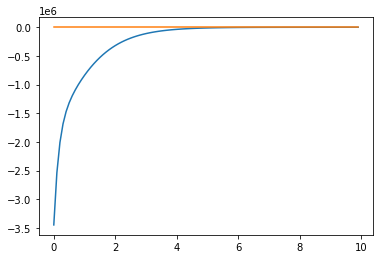

In [12]:
plt.plot(x1,z2)
plt.plot(x1,t)